In [1]:
from astropy.table import Table

In [33]:
basepath = '/orange/adamginsburg/jwst/brick/'
basetable = Table.read(f'{basepath}/catalogs/crowdsource_nrca_photometry_tables_merged.fits')
basetableuw = Table.read(f'{basepath}/catalogs/crowdsource_unweighted_nrca_photometry_tables_merged.fits')
basetablensky0 = Table.read(f'{basepath}/catalogs/crowdsource_nsky0_nrca_photometry_tables_merged.fits')
basetablensky1 = Table.read(f'{basepath}/catalogs/crowdsource_nsky1_nrca_photometry_tables_merged.fits')
#basetablensky15 = Table.read(f'{basepath}/catalogs/crowdsource_nsky15_nrca_photometry_tables_merged.fits')

In [3]:
import os, datetime

In [4]:
datetime.datetime.fromtimestamp(os.path.getmtime(f'{basepath}/F466N/f466n_nrca_crowdsource.fits'))

datetime.datetime(2022, 11, 6, 11, 24, 48)

In [5]:
datetime.datetime.fromtimestamp(os.path.getmtime(f'{basepath}/F466N/f466n_nrca_crowdsource_unweighted.fits'))

datetime.datetime(2022, 11, 6, 11, 23, 12)

In [6]:
datetime.datetime.fromtimestamp(os.path.getmtime(f'{basepath}/F410M/f410m_nrca_crowdsource.fits'))

datetime.datetime(2022, 11, 6, 1, 30, 18, fold=1)

In [7]:
datetime.datetime.fromtimestamp(os.path.getmtime(f'{basepath}/F410M/f410m_nrca_crowdsource_unweighted.fits'))

datetime.datetime(2022, 11, 6, 1, 26, 5, fold=1)

In [8]:
datetime.datetime.fromtimestamp(os.path.getmtime(f'{basepath}/catalogs/crowdsource_nrca_photometry_tables_merged.fits'))

datetime.datetime(2022, 11, 6, 16, 2, 58)

In [9]:
datetime.datetime.fromtimestamp(os.path.getmtime(f'{basepath}/catalogs/crowdsource_unweighted_nrca_photometry_tables_merged.fits'))

datetime.datetime(2022, 11, 6, 16, 3, 10)

In [35]:
c410uw = basetableuw['skycoord_f410m']
c410nsky1 = basetablensky1['skycoord_f410m']
c410nsky0 = basetablensky0['skycoord_f410m']
c410 = basetable['skycoord_f410m']

In [37]:
ind, sep, _ = c410uw.match_to_catalog_sky(c410)
indnsky1, sepnsky1, _ = c410nsky1.match_to_catalog_sky(c410)
indnsky0, sepnsky0, _ = c410nsky0.match_to_catalog_sky(c410)

In [38]:
%matplotlib inline
import pylab as pl

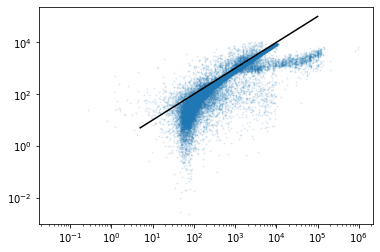

In [41]:
pl.scatter(basetable['flux_f410m'][ind], basetableuw['flux_f410m'], s=1, alpha=0.1)
pl.plot([5,1e5], [5,1e5], 'k')
pl.loglog();

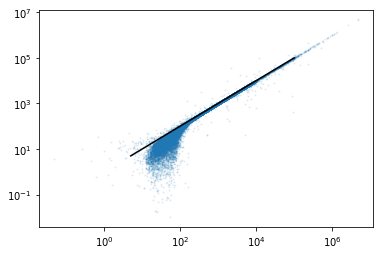

In [42]:
pl.scatter(basetable['flux_f410m'][indnsky0], basetablensky0['flux_f410m'], s=1, alpha=0.1)
pl.plot([5,1e5], [5,1e5], 'k')
pl.loglog();

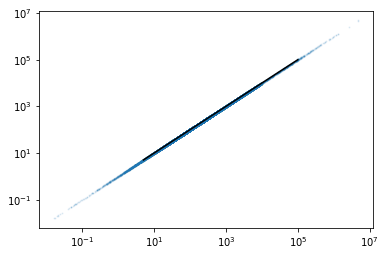

In [43]:
pl.scatter(basetable['flux_f410m'][indnsky1], basetablensky1['flux_f410m'], s=1, alpha=0.1)
pl.plot([5,1e5], [5,1e5], 'k')
pl.loglog();

[]

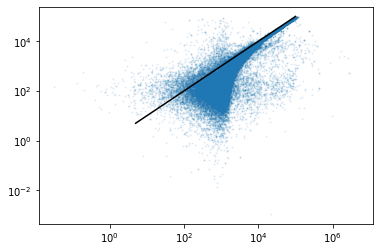

In [14]:
pl.scatter(basetable['flux_f405n'][ind], basetableuw['flux_f405n'], s=1, alpha=0.1)
pl.plot([5,1e5], [5,1e5], 'k')
pl.loglog()

[]

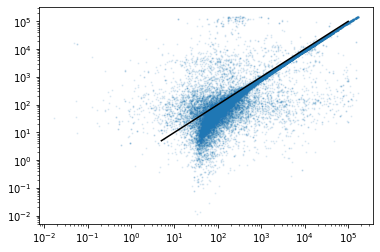

In [15]:
pl.scatter(basetable['flux_f466n'][ind], basetableuw['flux_f466n'], s=1, alpha=0.1)
pl.plot([5,1e5], [5,1e5], 'k')
pl.loglog()

In [16]:
import sys, imp
sys.path.append(f'{basepath}/analysis/')
import plot_tools
imp.reload(plot_tools)

<module 'plot_tools' from '/orange/adamginsburg/jwst/brick//analysis/plot_tools.py'>

# Safety Checks

based on Schlafly's recommendations:
https://github.com/schlafly/crowdsource/issues/12#issuecomment-1304063765

In [17]:
# https://github.com/schlafly/crowdsource/issues/12#issuecomment-1304063765
exclude = ((basetable['qf_f466n'] < 0.95) | (basetable['fracflux_f466n'] < 0.95))

The "insanity" here is caused by the skymodel going nuts.

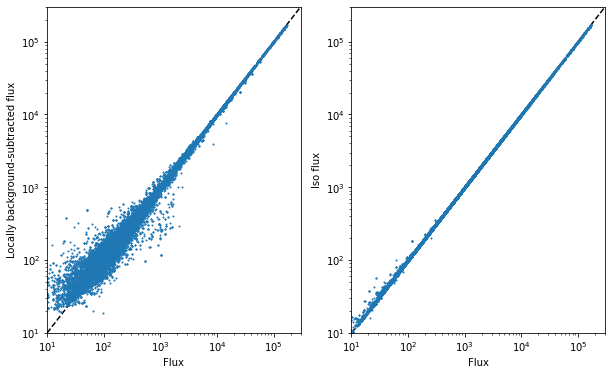

In [18]:
plot_tools.crowdsource_diagnostic(basetable, exclude, filtername='f466n')

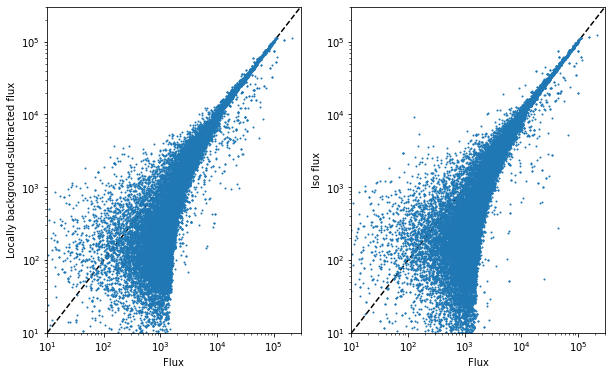

In [19]:
plot_tools.crowdsource_diagnostic(basetable, exclude, filtername='f405n')

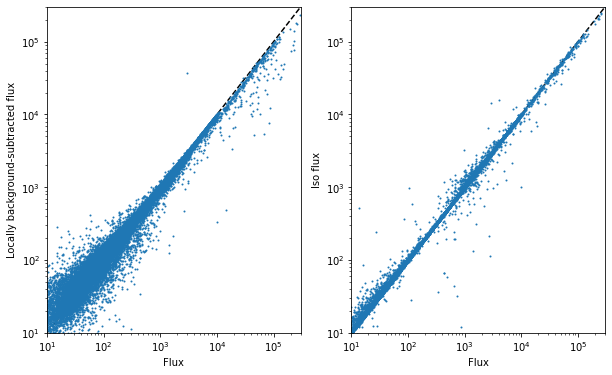

In [20]:
plot_tools.crowdsource_diagnostic(basetable, exclude, filtername='f410m')

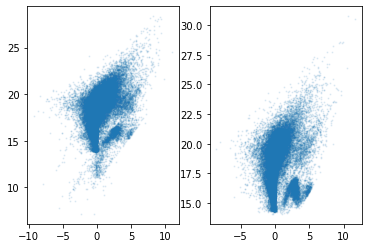

In [21]:
pl.subplot(1,2,1)
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=1, alpha=0.1)
pl.subplot(1,2,2)
pl.scatter(basetableuw['mag_ab_f410m'] - basetableuw['mag_ab_f466n'], basetableuw['mag_ab_f410m'], s=1, alpha=0.1)

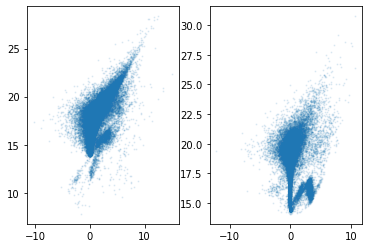

In [22]:
pl.subplot(1,2,1)
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f405n'], basetable['mag_ab_f410m'], s=1, alpha=0.1)
pl.subplot(1,2,2)
pl.scatter(basetableuw['mag_ab_f410m'] - basetableuw['mag_ab_f405n'], basetableuw['mag_ab_f410m'], s=1, alpha=0.1)

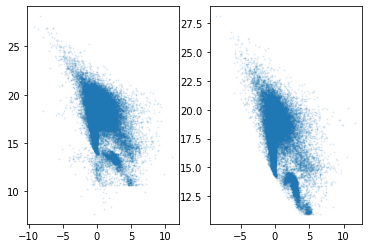

In [23]:
pl.subplot(1,2,1)
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f466n'], s=1, alpha=0.1)
pl.subplot(1,2,2)
pl.scatter(basetableuw['mag_ab_f410m'] - basetableuw['mag_ab_f466n'], basetableuw['mag_ab_f466n'], s=1, alpha=0.1)

In [24]:
from astropy.io import fits
import numpy as np
from astropy.visualization import simple_norm

In [25]:
fh = fits.open(f'{basepath}/F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits')
#fh = fits.open(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_i2d.fits')

In [26]:
err = fh['ERR'].data
data = fh['SCI'].data
wht = fh['WHT'].data
var = fh['VAR_POISSON'].data

In [27]:
fh.info()

Filename: /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     374   ()      
  1  SCI           1 ImageHDU        85   (2900, 2296)   float32   
  2  ERR           1 ImageHDU        10   (2900, 2296)   float32   
  3  CON           1 ImageHDU         9   (2900, 2296)   int32   
  4  WHT           1 ImageHDU         9   (2900, 2296)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2900, 2296)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2900, 2296)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (2900, 2296)   float32   
  8  HDRTAB        1 BinTableHDU    816   24R x 403C   [23A, 5A, 3A, 57A, 6A, 13A, 6A, 5A, 7A, 10A, 4A, L, D, D, D, D, 32A, 53A, 67A, 16A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 2A, L, 14A, 30A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 26A, 12A, 5A, D, D, D, D, D, D, 27A, D,

In [28]:
# crowdsource uses inverse-sigma, not inverse-variance
weight = err**-1
maxweight = np.percentile(weight[np.isfinite(weight)], 95)
minweight = np.percentile(weight[np.isfinite(weight)], 5)
badweight =  np.percentile(weight[np.isfinite(weight)], 1)
weight[err < 1e-5] = 0
weight[(err == 0) | (wht == 0)] = np.nanmedian(weight)
weight[np.isnan(weight)] = 0
bad = np.isnan(weight) | (data == 0) | np.isnan(data) | (weight == 0)

weight[weight > maxweight] = maxweight
weight[weight < minweight] = minweight
# it seems that crowdsource doesn't like zero weights
weight[bad] = minweight

/scratch/local/49957816/ipykernel_43909/3664777604.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  weight = err**-1


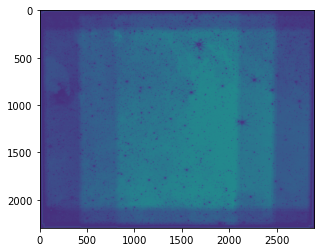

In [29]:
pl.imshow(weight, norm=simple_norm(err, min_percent=1, max_percent=99))

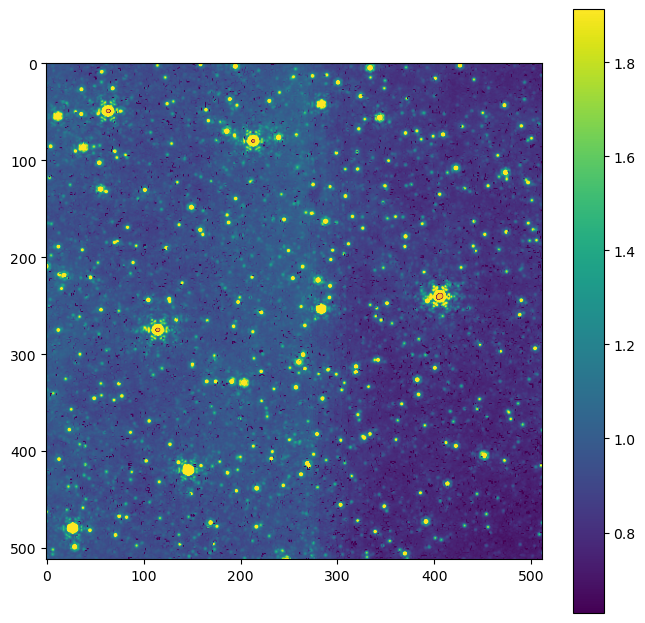

In [30]:
pl.figure(dpi=100, figsize=(8,8))
pl.imshow(err[512:1024,512:1024], norm=simple_norm(err[512:1024,512:1024], min_percent=1, max_percent=99))
pl.colorbar()
pl.contour(err[512:1024,512:1024]==0, cmap='inferno')

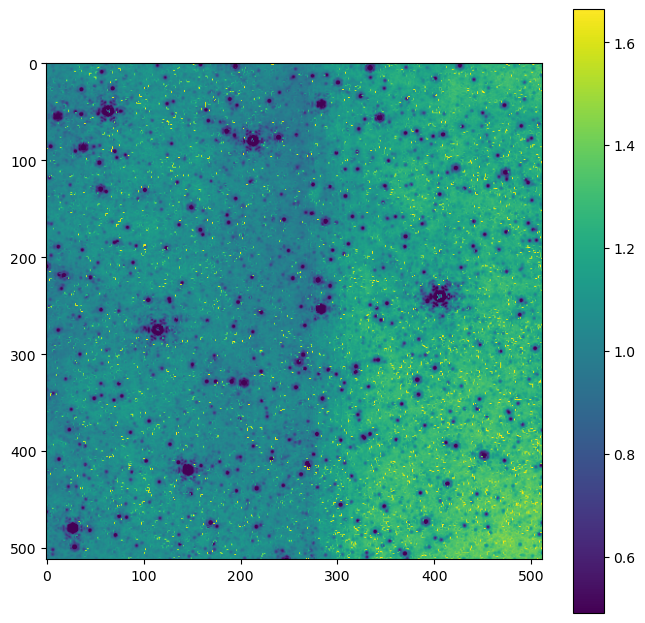

In [31]:
pl.figure(dpi=100, figsize=(8,8))
pl.imshow(weight[512:1024,512:1024], norm=simple_norm(weight[512:1024,512:1024], min_percent=0.1, max_percent=99.9))
pl.colorbar()

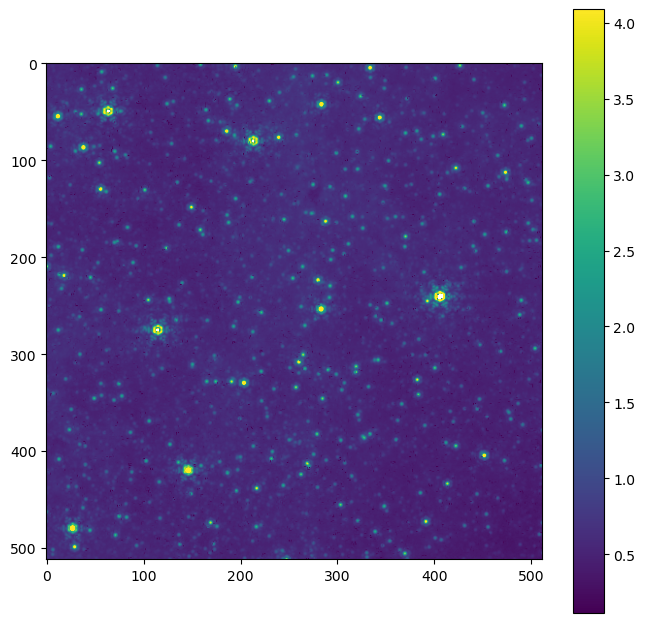

In [32]:
pl.figure(dpi=100, figsize=(8,8))
pl.imshow(var[512:1024,512:1024]**0.5, norm=simple_norm(var[512:1024,512:1024]**0.5, min_percent=0.1, max_percent=99.9))
pl.colorbar()

### Basic sanity check

Make sure F410M mag corresponds correctly to F410M flux

(6/24/2024: there's a huge offset)

In [2]:
import numpy as np
from astropy.table import Table
from astropy import units as u
import pylab as pl
from astropy.io import ascii, fits

In [3]:
basepath = '/orange/adamginsburg/jwst/brick'
#tbl = Table.read(f'{basepath}/catalogs/basic_merged-reproject_photometry_tables_merged.fits')

In [4]:
ls -lh {basepath}/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.*

-rw-r--r-- 1 adamginsburg adamginsburg 2.7G Jun 25 09:46 /orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.ecsv
-rw-r--r-- 1 adamginsburg adamginsburg 1.9G Jun 25 09:47 /orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits


In [5]:
tblfn = f'{basepath}/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits'
tbldata = fits.open(tblfn)[1].data[:5000]
basetable = tbl = Table(tbldata)
print(len(tbl))
tbl[:3]

5000


skycoord_ref.ra,skycoord_ref.dec,skycoord_ref_filtername,sep_f410m,id_f410m,skycoord_f410m.ra,skycoord_f410m.dec,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f212n,id_f212n,skycoord_f212n.ra,skycoord_f212n.dec,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f466n,id_f466n,skycoord_f466n.ra,skycoord_f466n.dec,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f405n,id_f405n,skycoord_f405n.ra,skycoord_f405n.dec,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f187n,id_f187n,skycoord_f187n.ra,skycoord_f187n.dec,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m.ra,skycoord_f182m.dec,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_model_f182m,fluxiso_f182m,xiso_f182m,yiso_f182m,flags_f182m,sky_f182m,mask_f182m,flux_jy_f182m,eflux_jy_f182m,mag_ab_f182m,emag_ab_f182m,near_saturated_f182m_f182m,replaced_saturated_f182m,sep_f444w,id_f444w,skycoord_f444w.ra,skycoord_f444w.dec,x_f444w,y_f444w,flux_f444w,passno_f444w,dx_f444w,dy_f444w,dflux_f444w,qf_f444w,rchi2_f444w,fracflux_f444w,fluxlbs_f444w,dfluxlbs_f444w,fwhm_f444w,spread_model_f444w,dspread_model_f444w,fluxiso_f444w,xiso_f444w,yiso_f444w,flags_f444w,sky_f444w,mask_f444w,flux_jy_f444w,eflux_jy_f444w,mag_ab_f444w,emag_ab_f444w,near_saturated_f444w_f444w,replaced_saturated_f444w,sep_f356w,id_f356w,skycoord_f356w.ra,skycoord_f356w.dec,x_f356w,y_f356w,flux_f356w,passno_f356w,dx_f356w,dy_f356w,dflux_f356w,qf_f356w,rchi2_f356w,fracflux_f356w,fluxlbs_f356w,dfluxlbs_f356w,fwhm_f356w,spread_model_f356w,dspread_model_f356w,fluxiso_f356w,xiso_f356w,yiso_f356w,flags_f356w,sky_f356w,mask_f356w,flux_jy_f356w,eflux_jy_f356w,mag_ab_f356w,emag_ab_f356w,near_saturated_f356w_f356w,replaced_saturated_f356w,sep_f200w,id_f200w,skycoord_f200w.ra,skycoord_f200w.dec,x_f200w,y_f200w,flux_f200w,passno_f200w,dx_f200w,dy_f200w,dflux_f200w,qf_f200w,rchi2_f200w,fracflux_f200w,fluxlbs_f200w,dfluxlbs_f200w,fwhm_f200w,spread_model_f200w,dspread_model_f200w,fluxiso_f200w,xiso_f200w,yiso_f200w,flags_f200w,sky_f200w,mask_f200w,flux_jy_f200w,eflux_jy_f200w,mag_ab_f200w,emag_ab_f200w,near_saturated_f200w_f200w,replaced_saturated_f200w,sep_f115w,id_f115w,skycoord_f115w.ra,skycoord_f115w.dec,x_f115w,y_f115w,flux_f115w,passno_f115w,dx_f115w,dy_f115w,dflux_f115w,qf_f115w,rchi2_f115w,fracflux_f115w,fluxlbs_f115w,dflux

In [6]:
from io import StringIO
tblfn = f'{basepath}/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.ecsv'
with open(tblfn, 'r') as fh:
    head = [next(fh) for _ in range(10000)]
basetable_e = tbl_e = Table.read(head, format='ascii.ecsv')

#basetable_e = tbl_e = ascii.read(tblfn, format='csv', guess=False,
#                 fast_reader={'chunk_size': 100 * 1000000})

#basetable_e = tbl_e = Table.read()[:5000]
print(len(tbl_e))
tbl_e[:3]

9398


skycoord_ref,skycoord_ref_filtername,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_model_f182m,fluxiso_f182m,xiso_f182m,yiso_f182m,flags_f182m,sky_f182m,mask_f182m,flux_jy_f182m,eflux_jy_f182m,mag_ab_f182m,emag_ab_f182m,near_saturated_f182m_f182m,replaced_saturated_f182m,sep_f444w,id_f444w,skycoord_f444w,x_f444w,y_f444w,flux_f444w,passno_f444w,dx_f444w,dy_f444w,dflux_f444w,qf_f444w,rchi2_f444w,fracflux_f444w,fluxlbs_f444w,dfluxlbs_f444w,fwhm_f444w,spread_model_f444w,dspread_model_f444w,fluxiso_f444w,xiso_f444w,yiso_f444w,flags_f444w,sky_f444w,mask_f444w,flux_jy_f444w,eflux_jy_f444w,mag_ab_f444w,emag_ab_f444w,near_saturated_f444w_f444w,replaced_saturated_f444w,sep_f356w,id_f356w,skycoord_f356w,x_f356w,y_f356w,flux_f356w,passno_f356w,dx_f356w,dy_f356w,dflux_f356w,qf_f356w,rchi2_f356w,fracflux_f356w,fluxlbs_f356w,dfluxlbs_f356w,fwhm_f356w,spread_model_f356w,dspread_model_f356w,fluxiso_f356w,xiso_f356w,yiso_f356w,flags_f356w,sky_f356w,mask_f356w,flux_jy_f356w,eflux_jy_f356w,mag_ab_f356w,emag_ab_f356w,near_saturated_f356w_f356w,replaced_saturated_f356w,sep_f200w,id_f200w,skycoord_f200w,x_f200w,y_f200w,flux_f200w,passno_f200w,dx_f200w,dy_f200w,dflux_f200w,qf_f200w,rchi2_f200w,fracflux_f200w,fluxlbs_f200w,dfluxlbs_f200w,fwhm_f200w,spread_model_f200w,dspread_model_f200w,fluxiso_f200w,xiso_f200w,yiso_f200w,flags_f200w,sky_f200w,mask_f200w,flux_jy_f200w,eflux_jy_f200w,mag_ab_f200w,emag_ab_f200w,near_saturated_f200w_f200w,replaced_saturated_f200w,sep_f115w,id_f115w,skycoord_f115w,x_f115w,y_f115w,flux_f115w,passno_f115w,dx_f115w,dy_f115w,dflux_f115w,qf_f115w,rchi2_f115w,fracflux_f115w,fluxlbs_f115w,dfluxlbs_f115w,fwhm_f115w,spread_model_f115w,dspread_model_f115w,fluxiso_f115w,xiso_f115w,yiso_f115w,flags_f115w,sky_f115w,mask_f115w,flux_jy_f115w,eflux_jy_f115w,mag_ab_f115w,emag_ab_f115w,near_saturated_f115w_f115w,replaced_saturated_f115w,flu

208.75045059896 Jy 0.042218402 -0.0015229213


/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


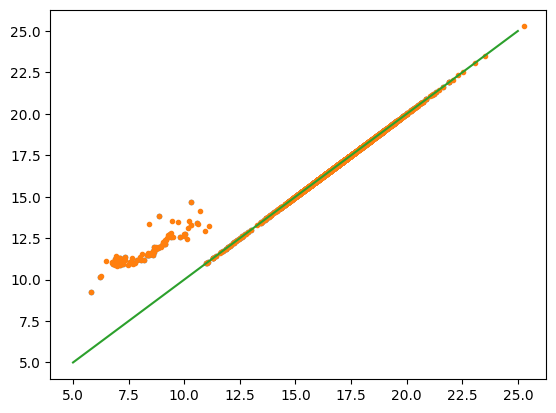

In [55]:
from astroquery.svo_fps import SvoFps
jfilts = SvoFps.get_filter_list('JWST')
jfilts.add_index('filterID')
filtername = 'f410m'
zeropoint = u.Quantity(jfilts.loc[f'JWST/NIRCam.{filtername.upper()}']['ZeroPoint'], u.Jy)
print(zeropoint, np.nanmax(basetable['flux_jy_f410m']), np.nanmin(basetable['flux_jy_f410m']))
abmag = -2.5 * np.log10(u.Quantity(basetable['flux_jy_f410m'], u.Jy) / zeropoint)
abmage = -2.5 * np.log10(u.Quantity(tbl_e['flux_jy_f410m'], u.Jy) / zeropoint)

#list(zip(basetable['mag_ab_f410m'][:1000], abmag[:1000]))
pl.plot(basetable['mag_ab_f410m'], abmag, '.')
pl.plot(tbl_e['mag_ab_f410m'], abmage, '.')
pl.plot([5,25], [5,25])

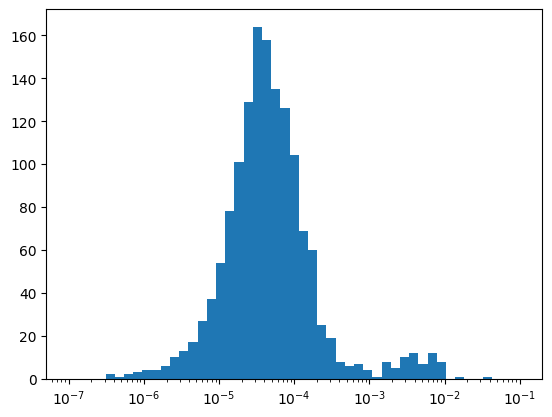

In [9]:
#pl.hist(basetable['flux_f410m'], bins=np.logspace(-2,6))
pl.hist(basetable['flux_jy_f410m'], bins=np.logspace(-7,-1))
pl.semilogx();

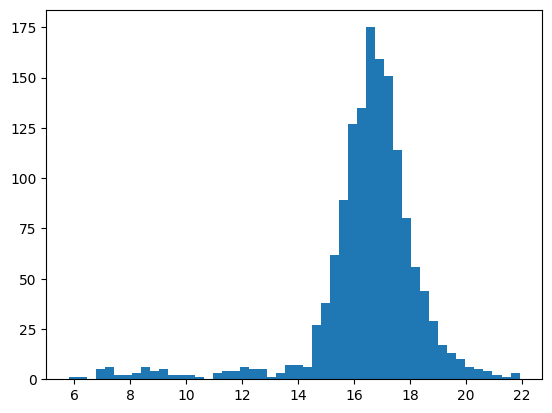

In [10]:
pl.hist(basetable['mag_ab_f410m'], bins=50);

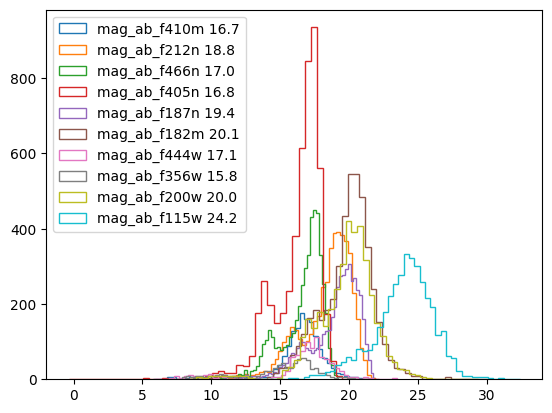

In [15]:
for cn in basetable.colnames:
    if cn.startswith('mag_ab_f'):
        pl.hist(basetable[cn], bins=50, label=f'{cn} {np.nanmedian(basetable[cn]):0.1f}', histtype='step')
pl.legend(loc='best');

In [12]:
np.unique(basetable['mag_ab_f410m'] - abmag)

<Quantity [-4.944969 , -4.4026203, -4.3626013, -4.1922436, -4.1283736,
           -4.1232715, -4.12278  , -4.0227685, -3.9317517, -3.8400407,
           -3.788104 , -3.7831688, -3.6731768, -3.4914422, -3.441783 ,
           -3.425365 , -3.3915863, -3.3162994, -3.29011  , -3.1856432,
           -3.1806688, -3.1745024, -3.1447878, -3.1426153, -3.1381311,
           -3.1258602, -3.1238174, -3.1147852, -3.1025715, -3.0920048,
           -3.089099 , -3.043107 , -3.0419388, -3.030756 , -3.0191107,
           -3.0106688, -2.8942232, -2.824975 , -2.736271 , -2.6924877,
            0.       ,        nan]>

In [29]:
10**(17.578835/2.5)

10753107.809130587

In [62]:
tblb = Table.read(f'{basepath}/F410M/f410m_merged_blur_crowdsource_nsky0.fits')
tbl = Table.read(f'{basepath}/F410M/f410m_merged_crowdsource_nsky0.fits')

In [63]:
tblb.colnames

['x',
 'y',
 'flux',
 'passno',
 'dx',
 'dy',
 'dflux',
 'qf',
 'rchi2',
 'fracflux',
 'fluxlbs',
 'dfluxlbs',
 'fwhm',
 'spread_model',
 'dspread_model',
 'fluxiso',
 'xiso',
 'yiso',
 'flags',
 'sky',
 'skycoord']

In [9]:
tblb['flux'][:5], tbl['flux'][:5]

(<Column name='flux' dtype='float32' length=5>
 1496327.4
  389156.0
 294.82877
  488.3787
 3832.0774,
 <Column name='flux' dtype='float32' length=5>
 1496327.4
  389156.0
 294.82877
  488.3787
 3832.0774)

In [17]:
def readfirst(tblfn, nrows=10000):
    tbldata = fits.open(tblfn)[1].data[:nrows]
    return Table(tbldata)

In [49]:
import datetime
import os
def getmtime(fn):
    return datetime.datetime.strftime(datetime.datetime.fromtimestamp(os.path.getmtime(fn)), '%y-%m-%d')

In [54]:
import glob
for fn in (glob.glob(f'{basepath}/F410M/f410m_merged_*crowdsource_nsky0.fits') +
          glob.glob(f'{basepath}/F410M/f410m_merged-reproject_*crowdsource_nsky0.fits') +
          glob.glob(f'{basepath}/F410M/f410m_merged*_daophot*.fits')
          #glob.glob(f'{basepath}/F182M/f182m_merged_*crowdsource_nsky0.fits') +
          #glob.glob(f'{basepath}/F182M/f182m_merged-reproject_*crowdsource_nsky0.fits')
          ):
    if 'exp' not in fn:
        tb = readfirst(fn, nrows=-1)
        cn = 'flux' if 'crowdsource' in fn else 'flux_fit'
        print(f'{fn.split("/")[-1][13:]:45s}, {getmtime(fn)}, {len(tb):10d}, {np.nanmedian(tb[cn]):10.1f},'
              f' {np.nanpercentile(tb[cn], 90):10.1f}, {np.nanpercentile(tb[cn], 10):10.1f}')

crowdsource_nsky0.fits                       , 24-06-24,     447776,       49.2,      391.8,        4.8
unsatstar_crowdsource_nsky0.fits             , 22-11-06,     139083,      122.3,     1310.1,       14.5
fitpsf_crowdsource_nsky0.fits                , 24-06-24,     134596,      307.5,     1899.0,       22.2
fitpsf_blur_crowdsource_nsky0.fits           , 24-06-22,     123857,      344.5,     2091.6,       25.1
bgsub_crowdsource_nsky0.fits                 , 23-06-11,     172563,       52.6,     1422.4,     -231.1
blur_crowdsource_nsky0.fits                  , 24-06-22,     462039,       59.2,      411.1,        8.4
reproject_fitpsf_crowdsource_nsky0.fits      , 24-05-08,     134033,      272.9,     1738.6,       21.7
reproject_bgsub_crowdsource_nsky0.fits       , 23-07-03,     155762,       56.1,     2072.0,     -205.0
reproject_crowdsource_nsky0.fits             , 24-05-08,     490227,       46.1,      434.8,        6.0
blur_daophot_iterative.fits                  , 24-06-20,     523

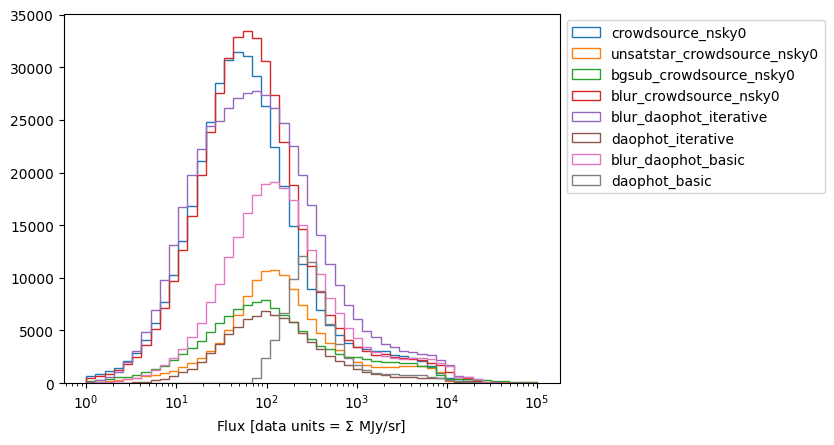

In [86]:
import glob

for fn in (glob.glob(f'{basepath}/F410M/f410m_merged_*crowdsource_nsky0.fits') +
          #glob.glob(f'{basepath}/F410M/f410m_merged-reproject_*crowdsource_nsky0.fits') +
          glob.glob(f'{basepath}/F410M/f410m_merged_*daophot*.fits')
          #glob.glob(f'{basepath}/F182M/f182m_merged_*crowdsource_nsky0.fits') +
          #glob.glob(f'{basepath}/F182M/f182m_merged-reproject_*crowdsource_nsky0.fits')
          ):
    if 'exp' not in fn and 'psf' not in fn:
        tb = readfirst(fn, nrows=-1)
        cn = 'flux' if 'crowdsource' in fn else 'flux_fit'
        name = fn.split("/")[-1][13:].split(".")[0]
        pl.hist(tb[cn], bins=np.logspace(0, 5), label=name, histtype='step')
pl.xlabel("Flux [data units = $\Sigma$ MJy/sr]")
pl.semilogx();
pl.legend(loc='upper left', bbox_to_anchor=(1,0,1,1));

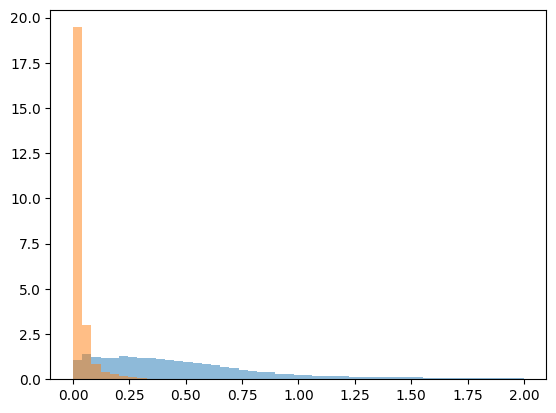

In [82]:
tb = Table.read(f'{basepath}/F410M/f410m_merged_daophot_iterative.fits')
pl.hist(tb['qfit'], bins=np.linspace(0,2), alpha=0.5);
pl.hist(tb['cfit'], bins=np.linspace(0,2), alpha=0.5);

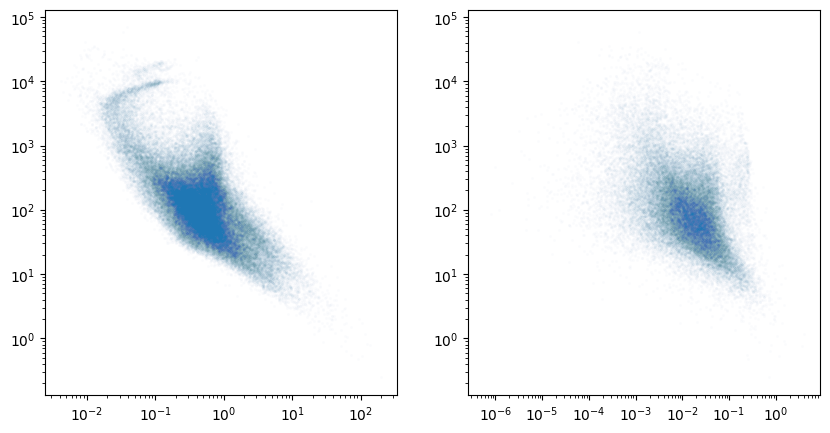

In [80]:
pl.figure(figsize=(10,5))
pl.subplot(1,2,1).scatter(tb['qfit'], tb['flux_fit'], alpha=0.01, s=2);
pl.loglog();
pl.subplot(1,2,2).scatter(tb['cfit'], tb['flux_fit'], alpha=0.01, s=2);
pl.loglog();

In [88]:
from astropy.wcs import WCS
from astropy.io import fits
ww = WCS(fits.getheader(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_i2d.fits', ext=('SCI', 1)))
imgdata = fits.getdata(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_i2d.fits', ext=('SCI', 1))
tbl.meta['pixelscale_deg2'] = ww.proj_plane_pixel_area()
tbl.meta['pixelscale_arcsec'] = (ww.proj_plane_pixel_area()**0.5).to(u.arcsec)
flux_jy = (tbl['flux'] * u.MJy/u.sr * tbl.meta['pixelscale_deg2']).to(u.Jy)

Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.661125 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526408297.850 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/blue/adamginsburg/adamginsburg/repos/astropy/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


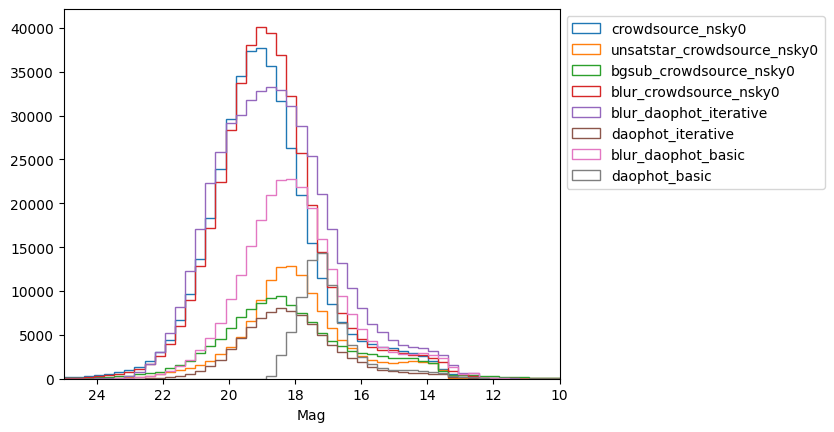

In [90]:


filtername = 'f410m'
zeropoint = u.Quantity(jfilts.loc[f'JWST/NIRCam.{filtername.upper()}']['ZeroPoint'], u.Jy)


for fn in (glob.glob(f'{basepath}/F410M/f410m_merged_*crowdsource_nsky0.fits') +
          #glob.glob(f'{basepath}/F410M/f410m_merged-reproject_*crowdsource_nsky0.fits') +
          glob.glob(f'{basepath}/F410M/f410m_merged_*daophot*.fits')
          #glob.glob(f'{basepath}/F182M/f182m_merged_*crowdsource_nsky0.fits') +
          #glob.glob(f'{basepath}/F182M/f182m_merged-reproject_*crowdsource_nsky0.fits')
          ):
    if 'exp' not in fn and 'psf' not in fn:
        tb = readfirst(fn, nrows=-1)
        cn = 'flux' if 'crowdsource' in fn else 'flux_fit'
        name = fn.split("/")[-1][13:].split(".")[0]
        flux = tb[cn]
        flux_jy = (tb[cn] * u.MJy/u.sr * ww.proj_plane_pixel_area()).to(u.Jy)

        abmag = -2.5 * np.log10(u.Quantity(flux_jy, u.Jy) / zeropoint)
        pl.hist(abmag, bins=np.linspace(10,25), label=name, histtype='step')
pl.xlabel("Mag")
pl.xlim(25, 10)
pl.legend(loc='upper left', bbox_to_anchor=(1,0,1,1));

In [11]:
flux_jy.max()

<Quantity 0.8390936 Jy>

In [12]:
tbl.meta['pixelscale_deg2']

<Quantity 3.05289674e-10 deg2>

In [13]:
row = tbl[np.argmin((tbl['x'] - 4669)**2 + (tbl['y'] - 2139)**2)]
print(f"{imgdata[2139,4669]} is much less than {row['flux']} (by {row['flux']/imgdata[2139,4669]}x), indicating that 'flux' is not a peak measurement")

847.0582885742188 is much less than 8915.458984375 (by 10.525200843811035x), indicating that 'flux' is not a peak measurement


# So apparently the published magnitudes are way off

I made a mistake in the 2023 publication; probably needs to be errata'd

In [14]:
tbl['fwhm'].mean()**2 * (2*np.pi / (8*np.log(2)))

12.123574224030678

# Are any of the tables right?

In [15]:
ls $basepath/catalogs/crowdsource*merged*merged.fits

/orange/adamginsburg/jwst/brick/catalogs/crowdsource_desat_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_merged-reproject_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_desat_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky1_desat_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky1_merged_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky1_merged-reproject_photometry_tables_merged.fits
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_unweighted_bgsub_merged_photometry_tables_merged.fits

In [16]:
import os, datetime, glob

/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_desat_merged_photometry_tables_merged.fits 2023-07-20 23:02:11 5000
208.75045059896 Jy


/scratch/local/33675441/ipykernel_3692344/2215984064.py:11: RuntimeWarning: invalid value encountered in log10
  abmag = -2.5 * np.log10(tbl['flux_f410m'] / zeropoint)


/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky1_desat_merged_photometry_tables_merged.fits 2023-07-20 23:22:12 5000
208.75045059896 Jy
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_unweighted_merged_photometry_tables_merged.fits 2024-06-23 21:25:44 5000
208.75045059896 Jy
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits 2024-06-24 06:03:18 5000
208.75045059896 Jy
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_nsky1_merged_photometry_tables_merged.fits 2024-06-24 07:17:19 5000
208.75045059896 Jy
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_unweighted_bgsub_merged-reproject_photometry_tables_merged.fits 2023-07-20 19:27:10 5000
208.75045059896 Jy
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_merged-reproject_photometry_tables_merged.fits 2023-10-03 21:38:56 5000
208.75045059896 Jy
/orange/adamginsburg/jwst/brick/catalogs/crowdsource_merged_photometry_tables_merged.fits 2023-10-04 00:15:43 5000
208.75045

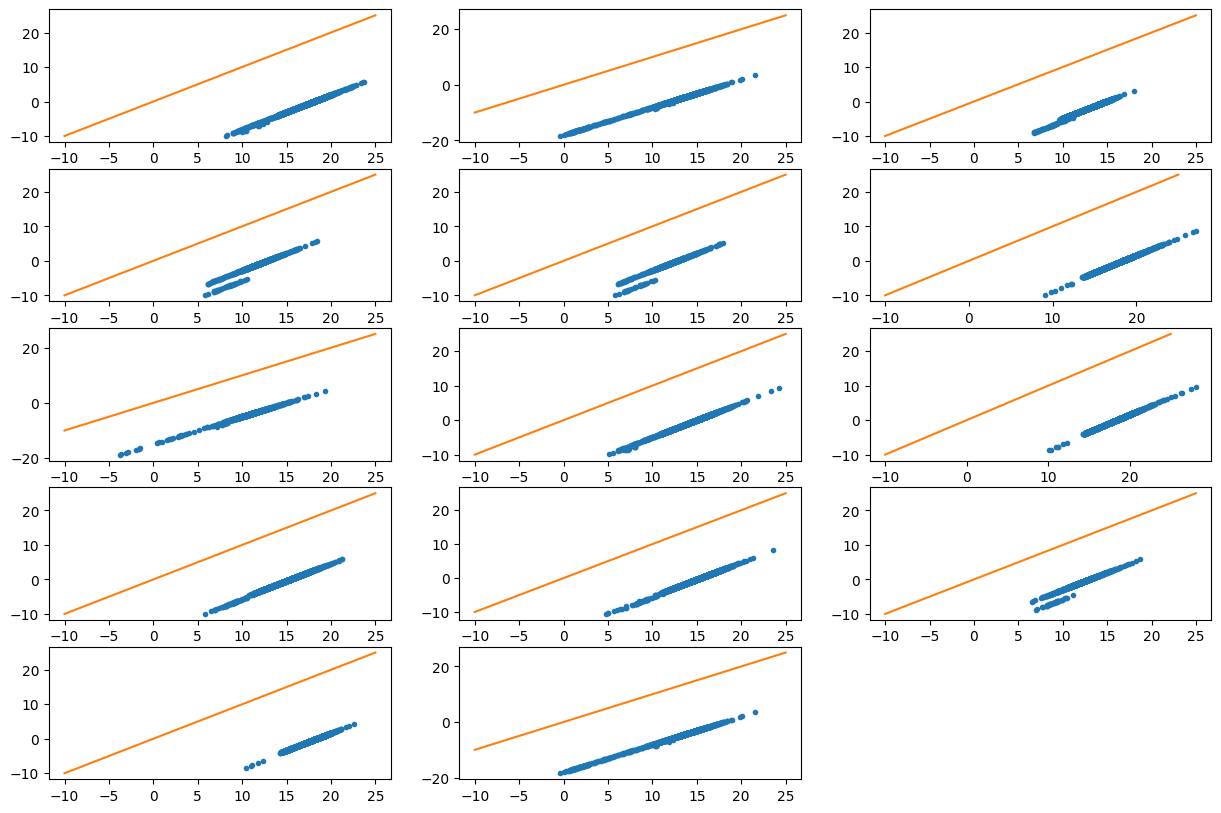

In [17]:
filtername = 'f410m'

pl.figure(figsize=(15,10))
for ii, fn in enumerate(glob.glob(f"{basepath}/catalogs/crowdsource*merged*merged.fits")):
    mod = datetime.datetime.fromtimestamp(os.path.getmtime(fn))
    tbl = Table.read(fn)[:5000]
    print(fn, mod, len(tbl))
    
    zeropoint = u.Quantity(jfilts.loc[f'JWST/NIRCam.{filtername.upper()}']['ZeroPoint'], u.Jy)
    print(zeropoint)
    abmag = -2.5 * np.log10(tbl['flux_f410m'] / zeropoint)
    
    pl.subplot(5, 3, ii+1).plot(tbl['mag_ab_f410m'], abmag, '.')
    pl.plot([-10,25], [-10,25])
    pl.title(fn.split("/")[-1])